In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt



  $$ \begin{align*} E &= - \frac{J}{2}\sum_{<i,j>} \sigma_i\sigma_j \\
   dE &= 2\cdot\sigma_i\sum_{<i,j>}\sigma_j
   \end{align*}
  
  
  
  $$

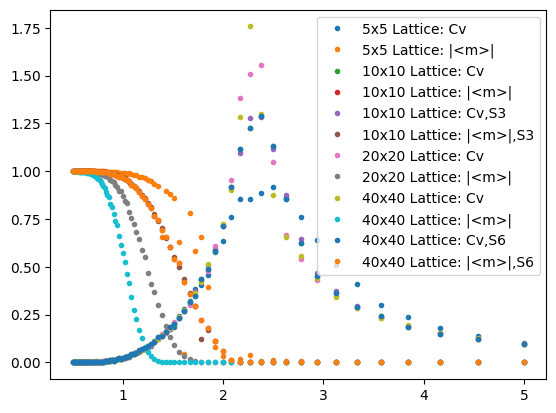

In [57]:
data = np.loadtxt("../build/simulation1.txt") # 5x5 Lattice, 10000 Sweep, ignore first 5000
N = 5**2
x = data[:,0]
y = data[:,1]
y2= data[:,2]
plt.plot(x,y/N,'.',label="5x5 Lattice: Cv")
plt.plot(x,abs(y2),'.',label="5x5 Lattice: |<m>|")

data = np.loadtxt("../build/simulation2.txt") # 10x10 Lattice, 10000 Sweep, ignore first 5000
N = 10**2
x = data[:,0]
y = data[:,1]
y2= data[:,2]
plt.plot(x,y/N,'.',label="10x10 Lattice: Cv")
plt.plot(x,abs(y2),'.',label="10x10 Lattice: |<m>|")
plt.legend()
data = np.loadtxt("../build/simulation3.txt") # 10x10 Lattice, 50000 Sweep, ignore first 20000
N = 10**2
x = data[:,0]
y = data[:,1]
y2= data[:,2]
plt.plot(x,y/N,'.',label="10x10 Lattice: Cv,S3")
plt.plot(x,abs(y2),'.',label="10x10 Lattice: |<m>|,S3")
plt.legend()

data = np.loadtxt("../build/simulation4.txt") # 20x20 Lattice, 10000 Sweep, ignore first 5000
N = 20**2
x = data[:,0]
y = data[:,1]
y2= data[:,2]
plt.plot(x,y/N,'.',label="20x20 Lattice: Cv")
plt.plot(x,abs(y2),'.',label="20x20 Lattice: |<m>|")
plt.legend()

data = np.loadtxt("../build/simulation5.txt") # 40x40 Lattice, 200000 Sweep, ignore first 10000
N = 40**2
x = data[:,0]
y = data[:,1]
y2= data[:,2]
plt.plot(x,y/N,'.',label="40x40 Lattice: Cv")
plt.plot(x,abs(y2),'.',label="40x40 Lattice: |<m>|")

data = np.loadtxt("../build/simulation6.txt") # 40x40 Lattice, 200000 Sweep, ignore first 10000
N = 10**2
x = data[:,0]
y = data[:,1]
y2= data[:,2]
plt.plot(x,y/N,'.',label="40x40 Lattice: Cv,S6")
plt.plot(x,abs(y2),'.',label="40x40 Lattice: |<m>|,S6")
plt.legend()
plt.legend()
plt.show()

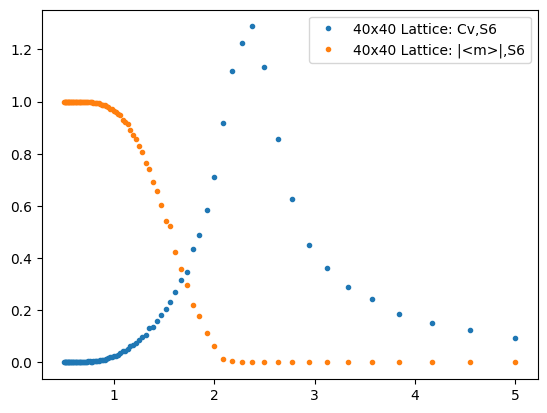

In [58]:
data = np.loadtxt("../build/simulation6.txt") # 40x40 Lattice, 200000 Sweep, ignore first 10000
N = 10**2
x = data[:,0]
y = data[:,1]
y2= data[:,2]
plt.plot(x,y/N,'.',label="40x40 Lattice: Cv,S6")
plt.plot(x,abs(y2),'.',label="40x40 Lattice: |<m>|,S6")
plt.legend()
plt.legend()
plt.show()